# Exploratory Data Analysis (EDA) of Titanic dataset

In [192]:
import pandas as pd  # Read the datasets, data preprocessing steps will be done by this library.
import numpy as np   # works with arrays, like single dimention and multidimension arrays.
import matplotlib.pyplot as plt  # visuvalization library
import seaborn as sns  # visuvalization library
%matplotlib inline     

In [193]:
train= pd.read_csv('titanic_train.csv')

In [194]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory data Analysis

 Lets begin some exploratory data analysis!. Well lets start by checking out some missing data.

## Missing Data

 we use seaborn to creat a simple heat map to see where the missing data!

In [195]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

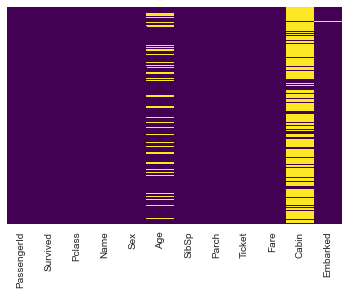

In [196]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

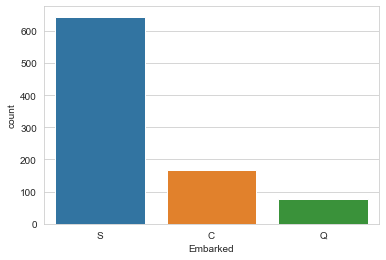

In [197]:
sns.set_style('whitegrid')
sns.countplot(x='Embarked', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

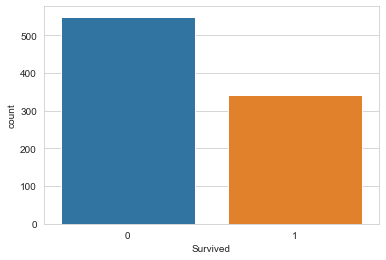

In [198]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

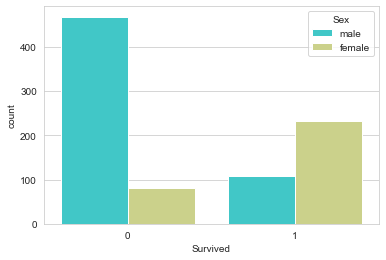

In [199]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train, palette= 'rainbow')

<AxesSubplot:xlabel='Survived', ylabel='count'>

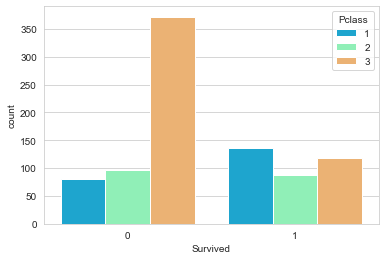

In [200]:
sns.set_style('whitegrid')
sns.countplot(x="Survived", hue='Pclass', data=train, palette= 'rainbow')

C:\Users\Rasheed\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

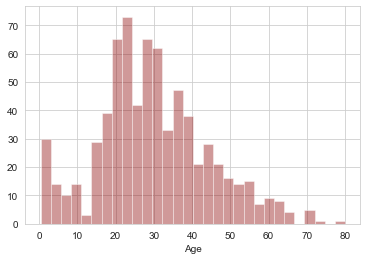

In [201]:
sns.distplot(train['Age'].dropna(), kde= False, bins=30, color='darkred' )

<AxesSubplot:xlabel='Age'>

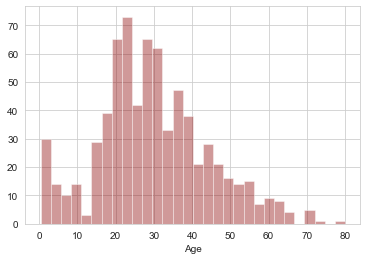

In [202]:
sns.distplot(train['Age'], kde= False, bins=30, color='darkred' )

<AxesSubplot:>

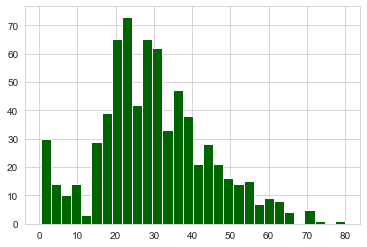

In [203]:
train['Age'].hist(bins=30,  color='darkgreen')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

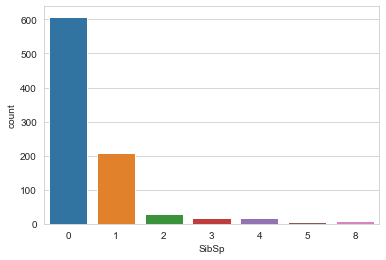

In [204]:
sns.countplot(x='SibSp', data= train)

<AxesSubplot:>

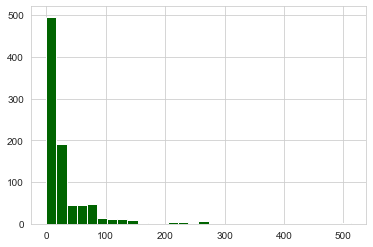

In [205]:
train['Fare'].hist(bins=30,  color='darkgreen')

C:\Users\Rasheed\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare'>

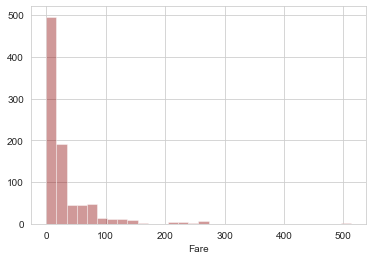

In [206]:
sns.distplot(train['Fare'], kde= False, bins=30, color='darkred' )

## Data cleaning

 we want to fill in the missing age data instead of just dropping the Age data Rows. One way to do this is by filling the 
 mean age of all of the passengers(inmputation). However we can be smarter about this and check the average age by passenger class.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

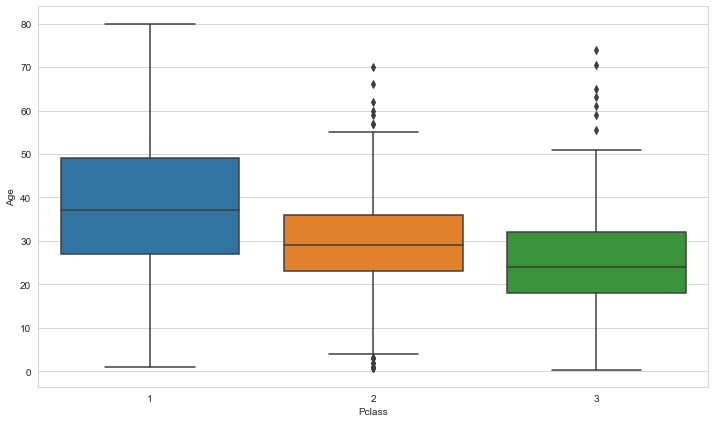

In [207]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data= train )

 we can see that welthier passengers in the higher classes tend to be older, which makes sence. we will use this average age 
  values to impute based on Pclass for Age. 

In [208]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
    
       if Pclass==1:
        return 37

       if Pclass==2:
        return 29
    
       else: 
        return 24
    
    else: 
        return Age
            

In [209]:
train['Age']= train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

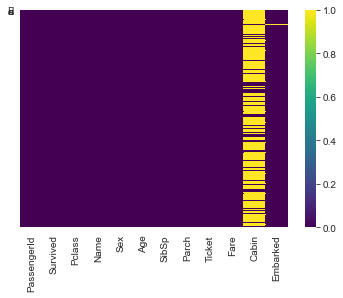

In [210]:
sns.heatmap(train.isnull(), yticklabels='False', cmap='viridis')

In [211]:
train.drop('Cabin', axis=1, inplace=True)

<AxesSubplot:>

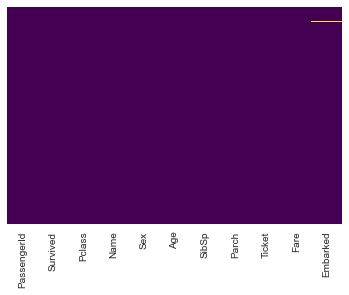

In [212]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [213]:
train['Embarked'].isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [214]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [215]:
train.dropna(inplace=True)

<AxesSubplot:>

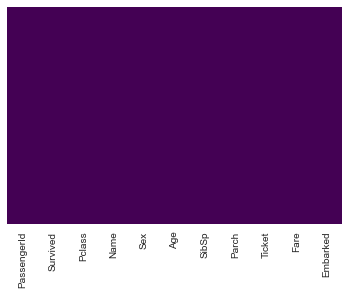

In [216]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Converting Categorical features

we will need to convert the categorical features to dummy variables using pandas! Otherwise our machine learning algorithm
won't be able to directly take those features as inputs. 

In [217]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [218]:
pd.get_dummies(train['Embarked'], drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [219]:
sex=pd.get_dummies(train['Sex'], drop_first=True)
embark=pd.get_dummies(train['Embarked'], drop_first=True)

what is Dummi variable Trap: droping the first Column by drop_first= Ture

In [220]:
train.drop(['Sex', 'Name', 'Ticket', 'Embarked' ], axis=1, inplace= True)

In [221]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [222]:
train=pd.concat([train, sex, embark], axis=1)

In [223]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Great! Our data is ready for our model

## Building a Logistical Regression model

Lets start by splitting the data into a training set and test set (there is another test.csv file is there that
you can play around with in case you want to use all this data for training )

### Train test split

In [225]:
# Because Survived feature is the dependent feature. so we need to separate it from indipendent features.
train.drop('Survived', axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [226]:
# this is the output dataset / test dataset / Dependent dataset 
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [303]:
from sklearn.model_selection import train_test_split

In [343]:
X_train,X_test,y_train,y_test =train_test_split( train.drop('Survived', axis=1), train['Survived'], test_size=0.30, random_state=101)

In [344]:
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
807,808,3,18.0,0,0,7.775,0,0,1
651,652,2,18.0,0,1,23.000,0,0,1
2,3,3,26.0,0,0,7.925,0,0,1
690,691,1,31.0,1,0,57.000,1,0,1
196,197,3,24.0,0,0,7.750,1,1,0


In [345]:
X_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
511,512,3,24.0,0,0,8.05,1,0,1
613,614,3,24.0,0,0,7.75,1,1,0
615,616,2,24.0,1,2,65.00,0,0,1
337,338,1,41.0,0,0,134.50,0,0,0
718,719,3,24.0,0,0,15.50,1,1,0


## Training and Predicting

In [346]:
from sklearn.linear_model import LogisticRegression

In [347]:
logmodel= LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\Rasheed\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [348]:
predictions=logmodel.predict(X_test)

In [349]:
from sklearn.metrics import confusion_matrix

In [350]:
accuracy= confusion_matrix(y_test, predictions)

In [351]:
accuracy

array([[149,  14],
       [ 39,  65]], dtype=int64)

In [352]:
from sklearn.metrics import accuracy_score

In [353]:
accuracy= accuracy_score(y_test, predictions)

In [354]:
accuracy

0.8014981273408239

In [355]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)